In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas_profiling
%matplotlib inline
from datetime import datetime
from dateutil.parser import parse
import seaborn as sns

In [ ]:
data=pd.read_csv(r'C:\Users\lizac\3D Objects\dat.csv',parse_dates=['dt'])

In [ ]:

#data['dt'] = pd.to_datetime(data['dt'],format='%m/%d/%Y')

In [ ]:
cor=data[['item_level','kills_made','credits','exp','is_surv','is_win']]

In [ ]:

df = cor
corr = df.corr()
corr.style.background_gradient()

In [ ]:
data_15_1=data[(data['dt'] >= '2015-12-10')&(data['dt'] <= '2015-12-15')&(data['patch']==1)].reset_index(drop=True)
#gap before patch 1

In [ ]:
data_15_1_Sess=pd.DataFrame(data_15_1.groupby(['dt'])['player_id'].count()).reset_index()
data_15_1_Sess.columns=['dt','count']
#ammount of sessions per day

In [ ]:
data_15_1_UU=data_15_1.groupby(['dt'])['player_id'].nunique().reset_index()
data_15_1_UU.columns=['dt','count']
#amount of unique users per day

In [ ]:
data_15_1_EA=round((data_15_1.groupby(['dt'])['exp'].sum()/data_15_1.groupby(['dt'])['player_id'].count()),0).reset_index()
data_15_1_EA.columns=['dt','count']
#avarage amount of experience

In [ ]:
data_15_1_CA=round((data_15_1.groupby(['dt'])['credits'].sum()/data_15_1.groupby(['dt'])['player_id'].count()),0).reset_index()
data_15_1_CA.columns=['dt','count']
#avarage amount of credits


In [ ]:
data_15_1_Win=(data_15_1.groupby(['item_nation'])['is_win'].sum()/data_15_1.groupby(['item_nation'])['is_win'].count()).reset_index()
#percantage of winers
#посмотреть потом по всей выборке, и посмотреть какой класс техники выбирают для новой ветки



In [ ]:
data_15_1_Win=(data_15_1.groupby(['dt'])['is_win'].sum()/data_15_1.groupby(['dt'])['is_win'].count()).reset_index()
#percantage of winers every day

In [ ]:
data_15_1_Surv=(data_15_1.groupby(['item_nation'])['is_surv'].sum()/data_15_1.groupby(['item_nation'])['is_surv'].count()).reset_index()
#percantage of survived
#посмотреть потом по всей выборке, и посмотреть какой класс техники выбирают для новой ветки

In [ ]:
data_15_1_TC=(data_15_1.groupby(['item_nation','item_level'])['player_id'].count()/data_15_1.groupby(['item_nation'])['player_id'].count()*100).reset_index()

#percentage of item level per class

In [ ]:
data_15_1_IC=(data_15_1.groupby(['item_nation'])['player_id'].count()/data_15_1['player_id'].count()*100).reset_index()
#percentage of item level per player


In [ ]:
#глянуть шо там по миграции, какие айдишники с какими танками начали играть за новые танки

In [ ]:
data_15_2=data[(data['dt'] >= '2015-12-16')&(data['dt'] <= '2015-12-24')&(data['patch']==1)].reset_index(drop=True)
#gap before patch 1

In [24]:
data_15_2_Sess=pd.DataFrame(data_15_2.groupby(['dt'])['player_id'].count()).reset_index()
data_15_2_Sess.columns=['dt','count']
#ammount of sessions per day

In [25]:
data_15_2_UU=data_15_2.groupby(['dt'])['player_id'].nunique().reset_index()
data_15_2_UU.columns=['dt','count']
#amount of unique users per day

In [26]:
data_15_2_EA=round((data_15_2.groupby(['dt'])['exp'].sum()/data_15_2.groupby(['dt'])['player_id'].count()),0).reset_index()
data_15_2_EA.columns=['dt','count']
#avarage amount of experience

In [27]:
data_15_2_CA=round((data_15_2.groupby(['dt'])['credits'].sum()/data_15_2.groupby(['dt'])['player_id'].count()),0).reset_index()
data_15_2_CA.columns=['dt','count']
#avarage amount of credits

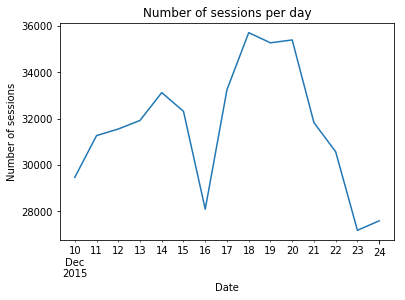

In [28]:
data_15_Sess=pd.concat([data_15_1_Sess,data_15_2_Sess])
data_15_Sess.set_index('dt',inplace=True)
from pandas import Series
from matplotlib import pyplot
series = data_15_Sess
series.plot(style='')
leg = pyplot.legend()
leg.remove()
pyplot.ylabel('Number of sessions')
pyplot.xlabel('Date')
pyplot.title('Number of sessions per day')
pyplot.show()


In [194]:
a=data[(data['dt'] =='2015-12-16')]

In [275]:
a=data_15_Sess=pd.concat([data_15_1,data_15_2])


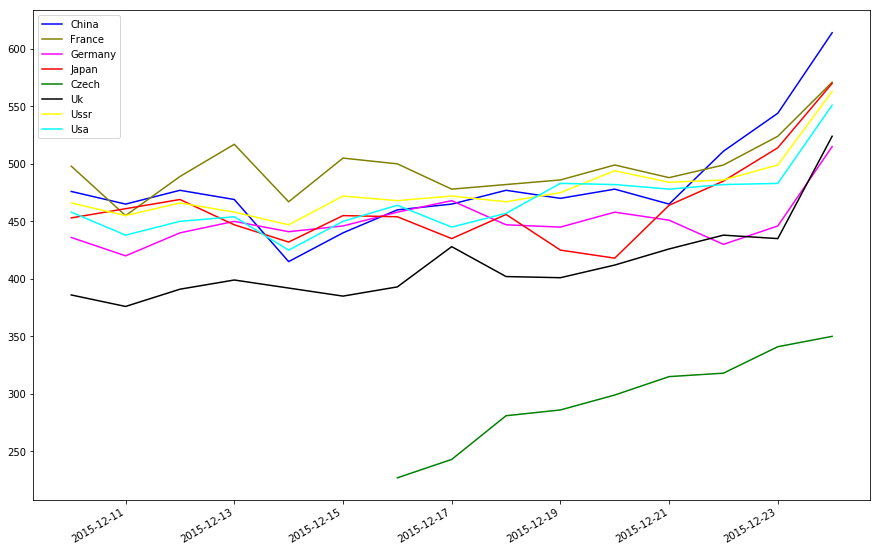

In [277]:
a=data_15_Sess=pd.concat([data_15_1,data_15_2])
b=round((a.groupby(['dt','item_nation'])['exp'].sum()/a.groupby(['dt','item_nation'])['player_id'].count()),0).reset_index().set_index('dt')

a=b
ch=a[a['item_nation']=='CHINA']
fr=a[a['item_nation']=='FRANCE']
gr=a[a['item_nation']=='GERMANY']
jp=a[a['item_nation']=='JAPAN']
cz=a[a['item_nation']=='CZECH']
uk=a[a['item_nation']=='UK']
ussr=a[a['item_nation']=='USSR']
usa=a[a['item_nation']=='USA']
plt.figure(figsize=(15,10))
plt.plot( ch[0], data=Ch, marker='',color='blue',label='China')
plt.plot( fr[0], data=fr, marker='', color='olive',label='France')
plt.plot( gr[0], data=gr, marker='', color='magenta',label='Germany')
plt.plot(jp[0], data=gr, marker='', color='red',label='Japan')
plt.plot( cz[0], data=cz, marker='',color='green',label='Czech')
plt.plot( uk[0], data=uk ,marker='', color='black',label='Uk')
plt.plot( ussr[0], data=ussr, marker='', color='yellow',label='Ussr')
plt.plot( usa[0], data=usa, marker='', color='cyan',label='Usa')

plt.gcf().autofmt_xdate()

plt.legend()

In [210]:
a=a.groupby(['item_nation','dt'])['player_id'].count()/a.groupby(['item_nation','dt'])['player_id'].nunique()

In [211]:
a=a.reset_index().set_index('dt')

In [224]:
ch=a[a['item_nation']=='CHINA']
fr=a[a['item_nation']=='FRANCE']
gr=a[a['item_nation']=='GERMANY']
jp=a[a['item_nation']=='JAPAN']
cz=a[a['item_nation']=='CZECH']
uk=a[a['item_nation']=='UK']
ussr=a[a['item_nation']=='USSR']
usa=a[a['item_nation']=='USA']


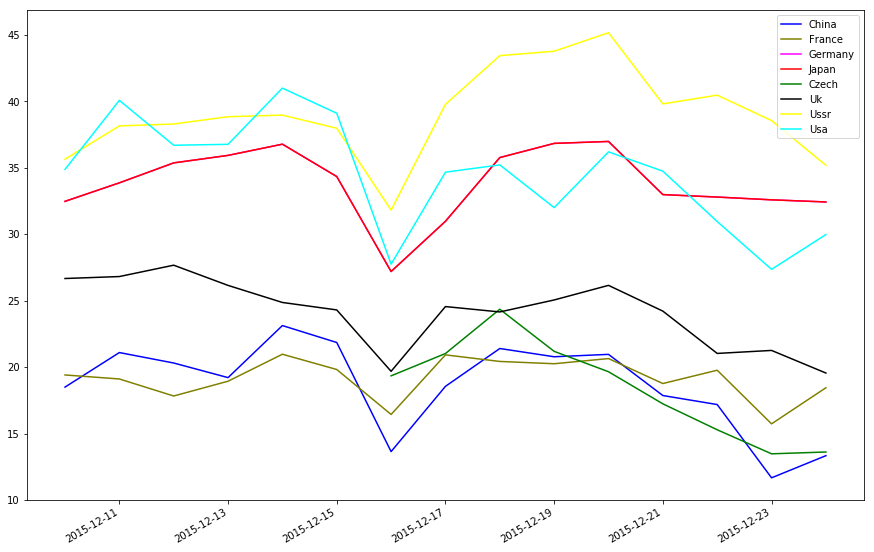

In [226]:
plt.figure(figsize=(15,10))
plt.plot( 'player_id', data=Ch, marker='',color='blue',label='China')
plt.plot( 'player_id', data=fr, marker='', color='olive',label='France')
plt.plot( 'player_id', data=gr, marker='', color='magenta',label='Germany')
plt.plot( 'player_id', data=gr, marker='', color='red',label='Japan')
plt.plot( 'player_id', data=cz, marker='',color='green',label='Czech')
plt.plot( 'player_id', data=uk ,marker='', color='black',label='Uk')
plt.plot( 'player_id', data=ussr, marker='', color='yellow',label='Ussr')
plt.plot( 'player_id', data=usa, marker='', color='cyan',label='Usa')

plt.gcf().autofmt_xdate()

plt.legend()


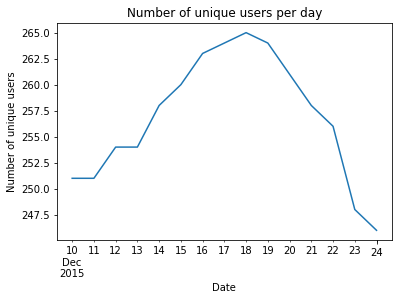

In [29]:
data_15_UU=pd.concat([data_15_1_UU,data_15_2_UU])
data_15_UU.set_index('dt',inplace=True)
from pandas import Series
from matplotlib import pyplot
series = data_15_UU
series.plot(style='')
leg = pyplot.legend()
leg.remove()
pyplot.ylabel('Number of unique users')
pyplot.xlabel('Date')
pyplot.title('Number of unique users per day')
pyplot.show()

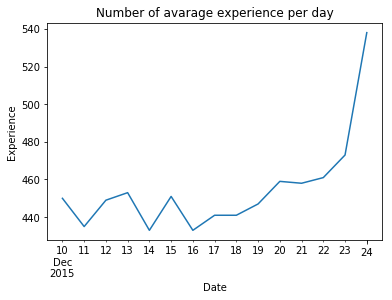

In [147]:
data_15_EA=pd.concat([data_15_1_EA,data_15_2_EA])
data_15_EA.set_index('dt',inplace=True)
from pandas import Series
from matplotlib import pyplot
series = data_15_EA
series.plot(style='')
leg = pyplot.legend()
leg.remove()
pyplot.ylabel('Experience')
pyplot.xlabel('Date')
pyplot.title('Number of avarage experience per day')
pyplot.show()

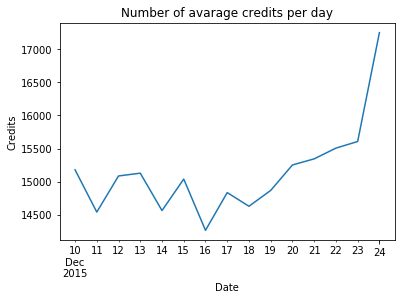

In [148]:
data_15_CA=pd.concat([data_15_1_CA,data_15_2_CA])
data_15_CA.set_index('dt',inplace=True)
from pandas import Series
from matplotlib import pyplot
series = data_15_CA
series.plot(style='')
leg = pyplot.legend()
leg.remove()
pyplot.ylabel('Credits')
pyplot.xlabel('Date')
pyplot.title('Number of avarage credits per day')
pyplot.show()

In [149]:
data_15_ITEM_BAR=(data_15_2.groupby(['item_nation'])['player_id'].count()/data_15_2['player_id'].count()*100).reset_index()
#percentage of item per player
data_15_ITEM_BAR=data_15_ITEM_BAR.sort_values('player_id')

Text(0.5,1,'% of item nation users play after Czhech branch launch')

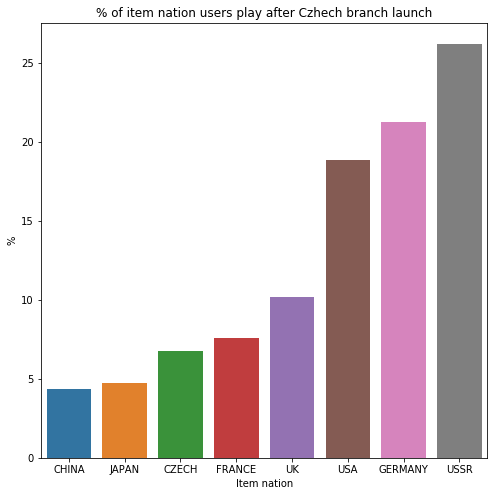

In [153]:

plt.figure(figsize=(8,8))
sns.barplot(x=data_15_ITEM_BAR['item_nation'],y=data_15_ITEM_BAR['player_id'])
plt.ylabel('%')
plt.xlabel('Item nation')
plt.title('% of item nation users play after Czhech branch launch')

In [28]:
data_15_ITEM_BAR_1=(data_15_1.groupby(['item_nation'])['player_id'].count()/data_15_1['player_id'].count()*100).reset_index()
#percentage of item level per player
data_15_ITEM_BAR_1=data_15_ITEM_BAR_1.sort_values('player_id')

Text(0.5,1,'% of item nation users play before Czhech branch launch')

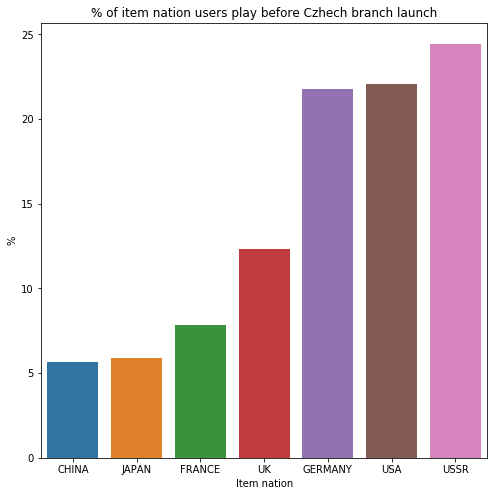

In [154]:

plt.figure(figsize=(8,8))
sns.barplot(x=data_15_ITEM_BAR_1['item_nation'],y=data_15_ITEM_BAR_1['player_id'])
plt.ylabel('%')
plt.xlabel('Item nation')
plt.title('% of item nation users play before Czhech branch launch')

Text(0.5,1,'Amoumt of credits each item gains before Czhech branch launch')

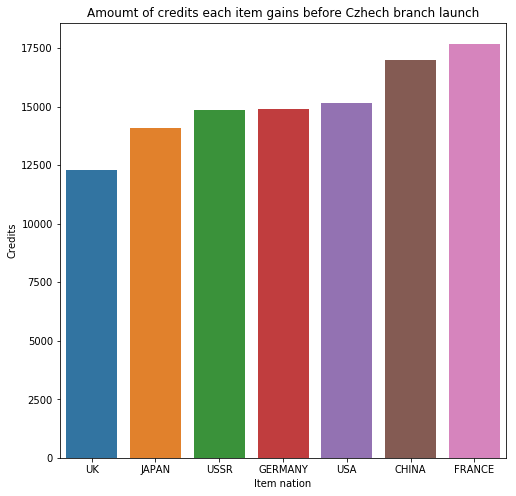

In [158]:
data_15_AV_CREDS=(data_15_1.groupby(['item_nation'])['credits'].sum()/data_15_1.groupby(['item_nation'])['player_id'].count()).reset_index()
data_15_AV_CREDS=pd.DataFrame(data_15_AV_CREDS)
#avarage amount of credits per country
data_15_AV_CREDS=data_15_AV_CREDS.sort_values(0)
plt.figure(figsize=(8,8))
sns.barplot(x=data_15_AV_CREDS['item_nation'],y=data_15_AV_CREDS[0])
plt.ylabel('Credits')
plt.xlabel('Item nation')
plt.title('Amoumt of credits each item gains before Czhech branch launch')

Text(0.5,1,'Amoumt of credits each item gains after Czhech branch launch')

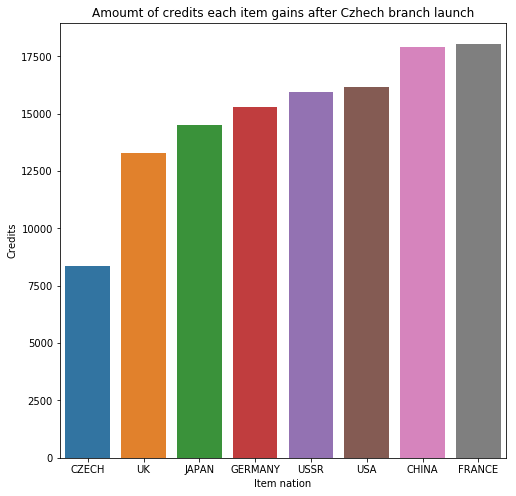

In [157]:
data_15_AV_CREDS=(data_15_2.groupby(['item_nation'])['credits'].sum()/data_15_2.groupby(['item_nation'])['player_id'].count()).reset_index()
data_15_AV_CREDS=pd.DataFrame(data_15_AV_CREDS)
#avarage amount of credits per country
data_15_AV_CREDS=data_15_AV_CREDS.sort_values(0)
plt.figure(figsize=(8,8))
sns.barplot(x=data_15_AV_CREDS['item_nation'],y=data_15_AV_CREDS[0])
plt.ylabel('Credits')
plt.xlabel('Item nation')
plt.title('Amoumt of credits each item gains after Czhech branch launch')

Text(0.5,1,'Amoumt of experience each item gains after Czhech branch launch')

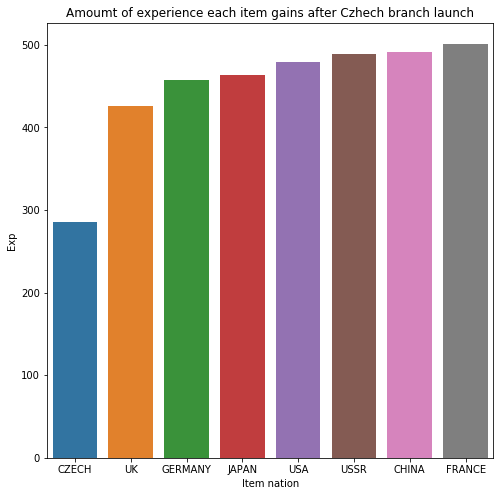

In [159]:
data_15_AV_CREDS=(data_15_2.groupby(['item_nation'])['exp'].sum()/data_15_2.groupby(['item_nation'])['exp'].count()).reset_index()
data_15_AV_CREDS=pd.DataFrame(data_15_AV_CREDS)
#avarage amount of credits per country
data_15_AV_CREDS=data_15_AV_CREDS.sort_values('exp')
plt.figure(figsize=(8,8))
sns.barplot(x=data_15_AV_CREDS['item_nation'],y=data_15_AV_CREDS['exp'])
plt.ylabel('Exp')
plt.xlabel('Item nation')
plt.title('Amoumt of experience each item gains after Czhech branch launch')

Text(0.5,1,'Amoumt of experience each item gains before Czhech branch launch')

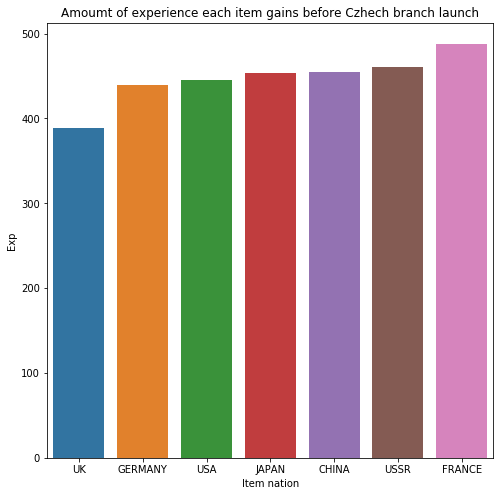

In [160]:
data_15_AV_CREDS=(data_15_1.groupby(['item_nation'])['exp'].sum()/data_15_1.groupby(['item_nation'])['exp'].count()).reset_index()
data_15_AV_CREDS=pd.DataFrame(data_15_AV_CREDS)
#avarage amount of credits per country
data_15_AV_CREDS=data_15_AV_CREDS.sort_values('exp')
plt.figure(figsize=(8,8))
sns.barplot(x=data_15_AV_CREDS['item_nation'],y=data_15_AV_CREDS['exp'])
plt.ylabel('Exp')
plt.xlabel('Item nation')
plt.title('Amoumt of experience each item gains before Czhech branch launch')

In [34]:
data_15_AV_CREDS

,item_nation,exp
1,CZECH,284.994468
5,UK,425.595608
3,GERMANY,457.662481
4,JAPAN,462.963722
6,USA,478.857454
7,USSR,488.459677
0,CHINA,490.797853
2,FRANCE,501.219374


In [168]:
data_15_CZ=data[(data['patch']==1)&(data['item_nation']=='CZECH')].reset_index(drop=True)

In [169]:
data_15_CZ_Sess=pd.DataFrame(data_15_CZ.groupby(['dt'])['player_id'].count()).reset_index()
data_15_CZ_Sess.columns=['dt','count']
#ammount of sessions per day

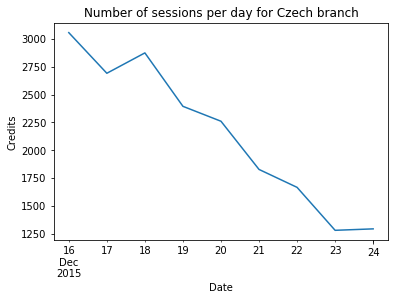

In [170]:
data_15_CZ_Sess.set_index('dt',inplace=True)
from pandas import Series
from matplotlib import pyplot
series = data_15_CZ_Sess
series.plot(style='')
leg = pyplot.legend()
leg.remove()
pyplot.ylabel('Number of sessions')
pyplot.xlabel('Date')
pyplot.title('Number of sessions per day for Czech branch')
pyplot.show()


In [171]:
data_15_CZ_UU=data_15_CZ.groupby(['dt'])['player_id'].nunique().reset_index()
data_15_CZ_UU.columns=['dt','count']

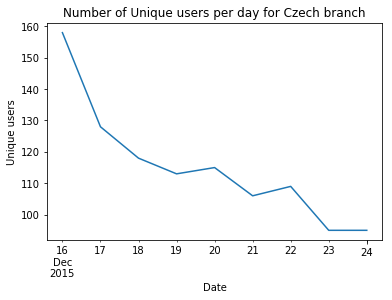

In [172]:
data_15_CZ_UU.set_index('dt',inplace=True)
from pandas import Series
from matplotlib import pyplot
series = data_15_CZ_UU
series.plot(style='')
leg = pyplot.legend()
leg.remove()
pyplot.ylabel('Unique users')
pyplot.xlabel('Date')
pyplot.title('Number of Unique users per day for Czech branch')
pyplot.show()

In [185]:
data_15_CZ_LVL=(data_15_CZ.groupby(['dt','item_level'])['player_id'].count()/data_15_CZ.groupby(['dt'])['player_id'].count()).reset_index()

In [186]:
df=data_15_CZ_LVL
df= df[df['player_id'].isin(df.groupby('dt').max()['player_id'].values)]

In [187]:
df=df[['dt','item_level']]

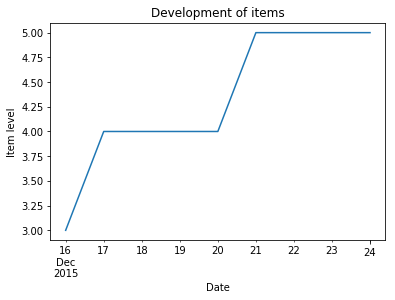

In [188]:
df.set_index('dt',inplace=True)
series = df
series.plot(style='')
leg = pyplot.legend()
leg.remove()
pyplot.ylabel('Item level')
pyplot.xlabel('Date')
pyplot.title('Development of items')
pyplot.show()
#уровень машин для чехии

In [184]:
data_15_CZ_EA=round((data_15_CZ.groupby(['dt'])['exp'].sum()/data_15_CZ.groupby(['dt'])['player_id'].count()),0).reset_index()

#avarage amount of experience

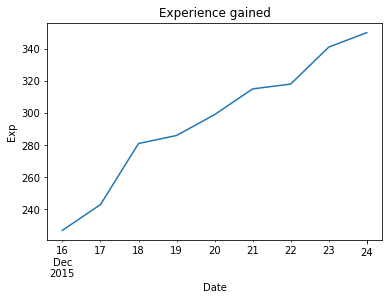

In [189]:
data_15_CZ_EA.set_index('dt',inplace=True)
series = data_15_CZ_EA
series.plot(style='')
leg = pyplot.legend()
leg.remove()
pyplot.ylabel('Exp')
pyplot.xlabel('Date')
pyplot.title('Experience gained')
pyplot.show()

In [190]:
data_15_1_OP=data_15_1[data_15_1['player_id'].isin(data_15_CZ['player_id'])] #who played both check

In [191]:
data_15_ITEM_BAR_OP=(data_15_1_OP.groupby(['item_nation'])['player_id'].count()/data_15_1_OP['player_id'].count()*100).reset_index()
#percentage of item level per player
data_15_ITEM_BAR_OP=data_15_ITEM_BAR_OP.sort_values('player_id')

Text(0.5,1,'% of item nation of users who tryes new branch')

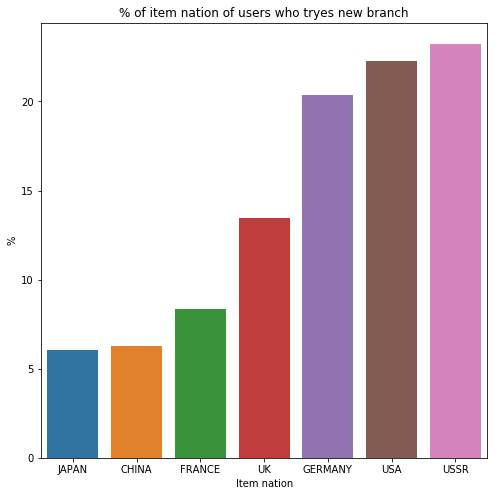

In [193]:

plt.figure(figsize=(8,8))
sns.barplot(x=data_15_ITEM_BAR_OP['item_nation'],y=data_15_ITEM_BAR_OP['player_id'])
plt.ylabel('%')
plt.xlabel('Item nation')
plt.title('% of item nation of users who tryes new branch')